<a href="https://colab.research.google.com/github/Manass20/NYC-Taxi-Trip-Time-Prediction---Capstone-Project/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

## **Import libraries:**

In [71]:
#Importing the libraries which will be required for this project.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

## **Mounting Google Drive:**

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/PROJECTS/Supervised ML - NYC Taxi Trip Time Prediction/NYC Taxi Data.csv')

## **Overview of the Dataset:**

In [74]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [75]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [76]:
# Cheeking the number of rows and columns
print("Number of rows is", df.shape[0])
print("Number of columns is", df.shape[1])

Number of rows is 1458644
Number of columns is 11


In [77]:
# Cheeking the features
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [78]:
# Cheeking null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## So there are no null values in our dataset.

In [79]:
# cheeking Datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


## Here we can see that pickup_datetime and dropoff_datetime are of "object" type. 

### We have to convert them into "datetime" type

In [80]:
# Changing the datatype from object to datetime format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df['dropoff_datetime'] = pd.to_datetime(df["dropoff_datetime"]) 

# Creating Features :-

### Let's extract and create new features from this datetime features we just created

In [81]:
# Creating day of the week column for pickup_weekday

df['pickup_weekday']=df['pickup_datetime'].dt.day_name()

In [82]:
# Creating day of the week column for dropoff_weekday

df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name()

In [83]:
# Creating day number column from pickup_datetime

df['pickup_weekday_num']=df['pickup_datetime'].dt.weekday

In [84]:
# Creating hour number column from pickup_datetime

df['pickup_hour']=df['pickup_datetime'].dt.hour

In [85]:
# Creating month number column from pickup_datetime

df['month']=df['pickup_datetime'].dt.month

We have created the following features:

- pickup_weekday which will contain the name of the day on which the ride was taken.
-pickup_weekday_num which will contain the day number instead of characters with Monday=0 and Sunday=6.

- pickup_hour with an hour of the day in the 24-hour format.

- pickup_month with month number with January=1 and December=12.

Now we can see that  we have coordinates in the form of longitude and latitude for pickup and dropoff. 

 But, we can’t really gather any insights or draw conclusions from that. So, the most obvious feature that we can extract from this is distance. Let us do that.

### Lets us calculate distance from given geographical coordinates.

In [86]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3


In [87]:
from geopy.distance import great_circle

def cal_dist(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

  ''' This function will calculat the distance from the given coordinate'''

  start_cord = (pickup_lat,pickup_long)
  stop_cord = (dropoff_lat,dropoff_long)

  return great_circle(start_cord,stop_cord).km

In [88]:
# Creating Feature Distance

df['distance'] = df.apply(lambda x: cal_dist(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [89]:
# Creating Calculated Speed
df['speed'] = df.distance/(df.trip_duration/3600)

## Now we will create a function that lets us determine what time of the day the ride was taken.

We will divide the day into four parts:-

1.Morning ( 6:00 am to 11:59 pm),

2.Afternoon ( 12 noon to 3:59 pm),

3.Evening ( 4:00 pm to 9:59 pm), and

4.Late Night ( 10:00 pm to 5:59 am)

In [90]:
def time_of_day(x):

    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

# creating new column for time of the day 

df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)

In [91]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


# **Univariate Analysis:**

Let us start with the target varibale i.e trip duration.

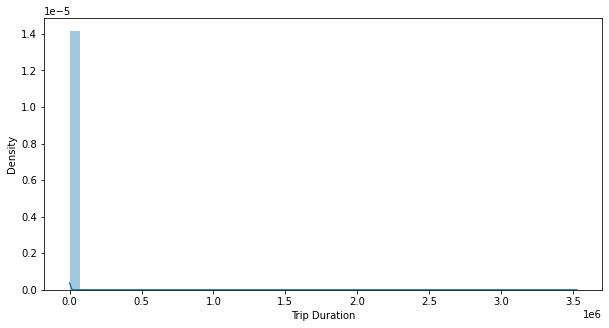

In [92]:
plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')
 
plt.show()

We can see that our target variable is rightly skewed , so we will apply log transformation to normalize it .

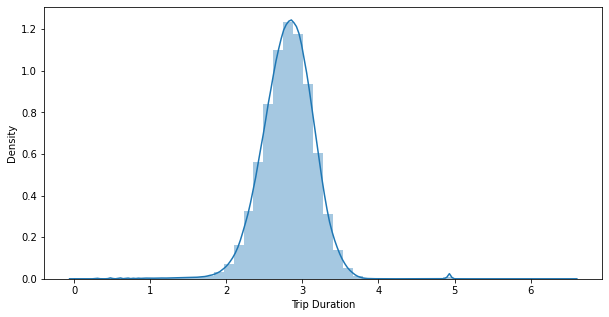

In [93]:
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()


Now that our target variable is normally distributed, we can see some outliers.

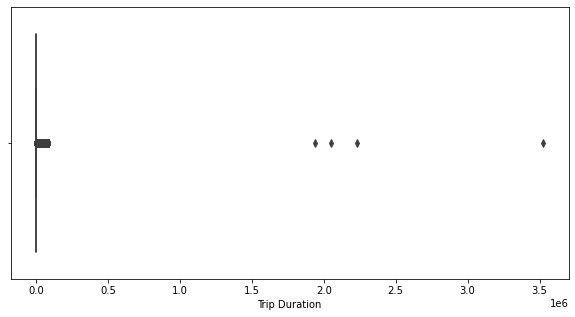

In [94]:
# checking outliers 
plt.figure(figsize = (10,5))
sns.boxplot(df.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

Now to find the correct percentile value for removal of outliers , we will calculate 0-100th percentille.

In [96]:
#Calclating 0-100th percentille
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


We can see that the 90th percentile i.e. 1634 looks reasonable. But, 100th percentile i.e. 3526282 is outlier.

Let us also check 90 - 100th percentile 

In [97]:
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


**Let's visualize the number of trips taken in minutes.**